In [ ]:
from keras.layers import Input,Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [ ]:
INPUT_SIZE=[224,224]
train_path='/content/drive/MyDrive/Colab Notebooks/X-Ray/Train'
valid_path='/content/drive/MyDrive/Colab Notebooks/X-Ray/Test'

In [ ]:
vgg=VGG16(input_shape=INPUT_SIZE+[3],weights='imagenet',include_top=False)

In [ ]:
for layer in vgg.layers:
  layer.trainable=False

In [ ]:
folders=glob('/content/drive/MyDrive/Colab Notebooks/X-Ray/Train/*')

In [ ]:
x=Flatten()(vgg.output)
x2=Dense(64,activation='relu')(x)
prediction=Dense(len(folders),activation='softmax')(x2)

In [ ]:
model=Model(inputs=vgg.input,outputs=prediction)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
training_set=train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=32,
    
    class_mode='categorical',
    shuffle=False
)

Found 9060 images belonging to 3 classes.


In [ ]:
test_set=train_datagen.flow_from_directory(
    valid_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 1158 images belonging to 3 classes.


In [ ]:
vgg_model=model.fit(
    training_set,
    epochs=10,
    validation_data=test_set,
    batch_size=32
)

Epoch 1/10
284/284 [==============================] - 201s 703ms/step - loss: 1.2062 - accuracy: 0.6073 - val_loss: 0.2259 - val_accuracy: 0.9421
Epoch 2/10
284/284 [==============================] - 200s 703ms/step - loss: 0.2339 - accuracy: 0.9225 - val_loss: 0.1772 - val_accuracy: 0.9404
Epoch 3/10
284/284 [==============================] - 199s 700ms/step - loss: 0.1746 - accuracy: 0.9448 - val_loss: 0.2041 - val_accuracy: 0.9326
Epoch 4/10
284/284 [==============================] - 218s 769ms/step - loss: 0.1491 - accuracy: 0.9495 - val_loss: 0.2597 - val_accuracy: 0.9136
Epoch 5/10
284/284 [==============================] - 196s 691ms/step - loss: 0.1443 - accuracy: 0.9550 - val_loss: 0.1714 - val_accuracy: 0.9404
Epoch 6/10
284/284 [==============================] - 198s 698ms/step - loss: 0.1479 - accuracy: 0.9576 - val_loss: 0.3008 - val_accuracy: 0.8998
Epoch 7/10
284/284 [==============================] - 196s 689ms/step - loss: 0.0933 - accuracy: 0.9688 - val_loss: 0.1409 -

In [ ]:
import pandas as pd


Text(0.5, 0, 'Epoch')

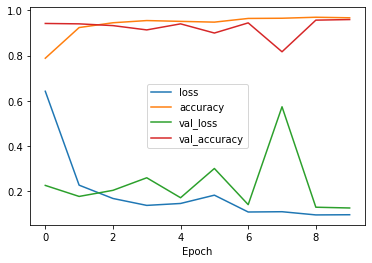

In [ ]:
pd.DataFrame(model.history.history).plot()
plt.xlabel('Epoch')


In [ ]:
vgg_model=model.fit(
    training_set,
    epochs=10,
    validation_data=test_set,
    batch_size=32
)

Epoch 1/10
284/284 [==============================] - 198s 699ms/step - loss: 0.1403 - accuracy: 0.9631 - val_loss: 0.1568 - val_accuracy: 0.9525
Epoch 2/10
284/284 [==============================] - 194s 681ms/step - loss: 0.1050 - accuracy: 0.9692 - val_loss: 0.6461 - val_accuracy: 0.8584
Epoch 3/10
284/284 [==============================] - 194s 685ms/step - loss: 0.1029 - accuracy: 0.9689 - val_loss: 0.3865 - val_accuracy: 0.8990
Epoch 4/10
284/284 [==============================] - 194s 685ms/step - loss: 0.1203 - accuracy: 0.9670 - val_loss: 1.8906 - val_accuracy: 0.7168
Epoch 5/10
284/284 [==============================] - 196s 690ms/step - loss: 0.2769 - accuracy: 0.9536 - val_loss: 0.2339 - val_accuracy: 0.9516
Epoch 6/10
284/284 [==============================] - 194s 682ms/step - loss: 0.1536 - accuracy: 0.9631 - val_loss: 0.4883 - val_accuracy: 0.8998
Epoch 7/10
284/284 [==============================] - 197s 693ms/step - loss: 0.1047 - accuracy: 0.9732 - val_loss: 0.2758 -

Text(0.5, 0, 'Epoch')

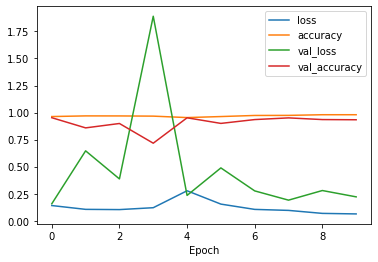

In [ ]:
pd.DataFrame(model.history.history).plot()
plt.xlabel('Epoch')

In [ ]:
vgg_model=model.fit(
    training_set,
    epochs=10,
    validation_data=test_set,
    batch_size=32
)

Epoch 1/10
284/284 [==============================] - 194s 682ms/step - loss: 0.0899 - accuracy: 0.9756 - val_loss: 0.2785 - val_accuracy: 0.9396
Epoch 2/10
284/284 [==============================] - 196s 690ms/step - loss: 0.0981 - accuracy: 0.9737 - val_loss: 0.9921 - val_accuracy: 0.8333
Epoch 3/10
284/284 [==============================] - 196s 692ms/step - loss: 0.0668 - accuracy: 0.9804 - val_loss: 0.4691 - val_accuracy: 0.9050
Epoch 4/10
284/284 [==============================] - 195s 688ms/step - loss: 0.1041 - accuracy: 0.9715 - val_loss: 0.2028 - val_accuracy: 0.9525
Epoch 5/10
284/284 [==============================] - 196s 689ms/step - loss: 0.0627 - accuracy: 0.9829 - val_loss: 0.3545 - val_accuracy: 0.9301
Epoch 6/10
284/284 [==============================] - 194s 684ms/step - loss: 0.0606 - accuracy: 0.9821 - val_loss: 2.8128 - val_accuracy: 0.6848
Epoch 7/10
284/284 [==============================] - 195s 686ms/step - loss: 0.2091 - accuracy: 0.9593 - val_loss: 0.3765 -

Text(0.5, 0, 'Epoch')

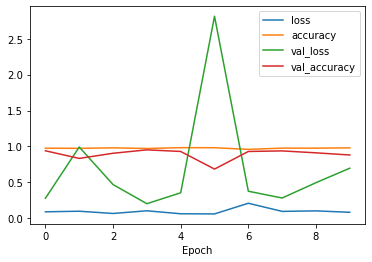

In [ ]:
pd.DataFrame(model.history.history).plot()
plt.xlabel('Epoch')

In [ ]:
import tensorflow as tf


In [ ]:
vgg_model_2=model.fit(
    training_set,
    epochs=1,
    validation_data=test_set,
    batch_size=32
)

284/284 [==============================] - 197s 695ms/step - loss: 0.0473 - accuracy: 0.9854 - val_loss: 0.2333 - val_accuracy: 0.9542


In [ ]:
model.save('AIModelVGG2.h5')

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

In [ ]:
model=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Model/AIModelVGG2.h5')

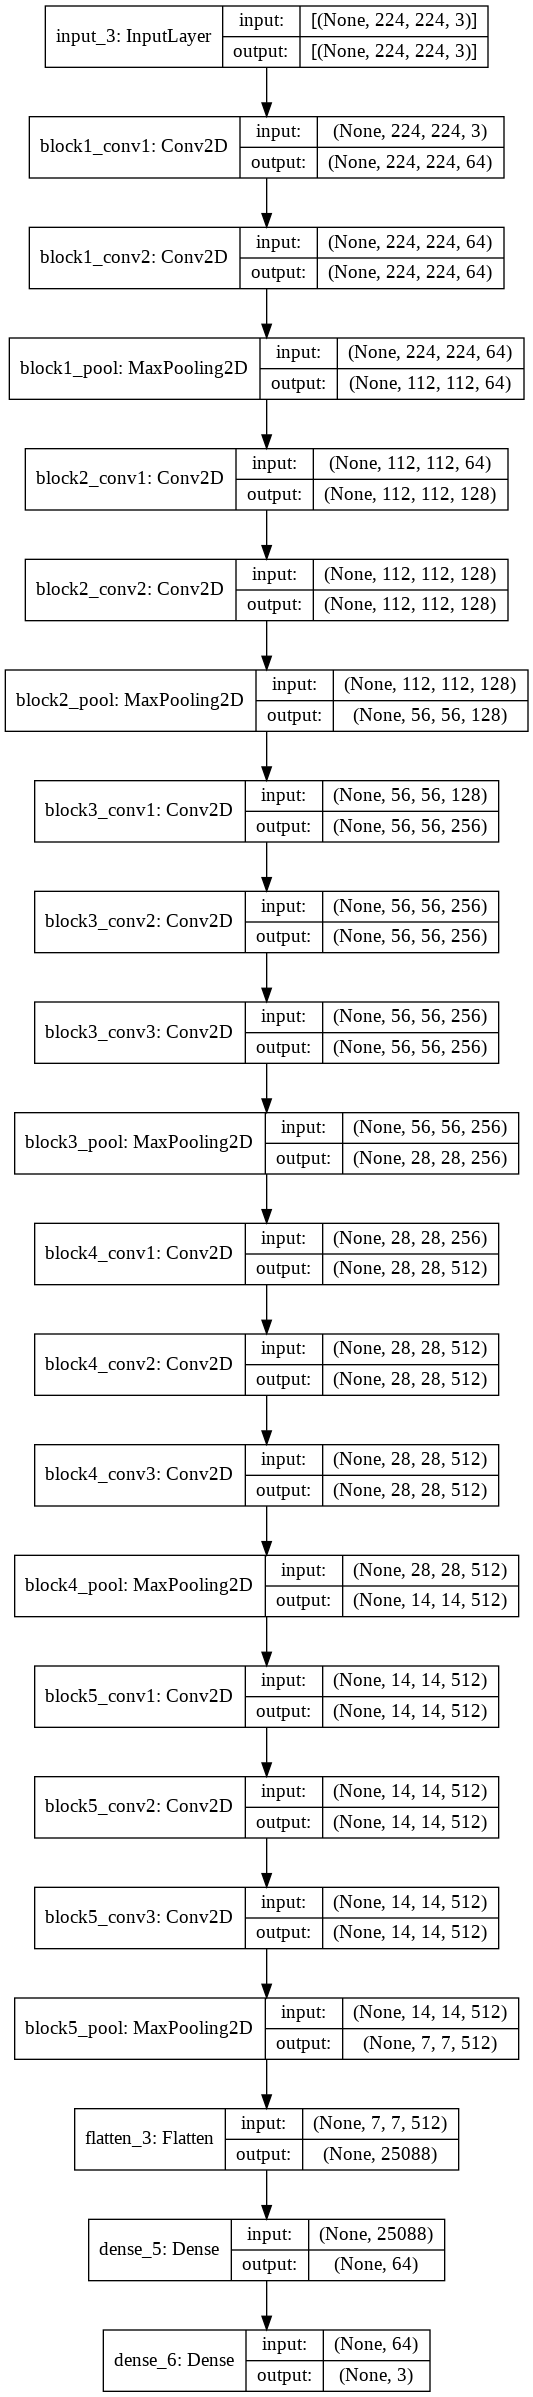

In [ ]:
plot_model(model,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [ ]:
preds = model.predict(test_set,verbose=1)

37/37 [==============================] - 22s 604ms/step


In [ ]:
predictions = preds.copy()
rounded_labels=np.argmax(preds, axis=1)

In [ ]:
import pandas as pd

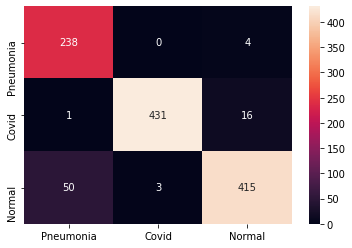

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
cm = pd.DataFrame(data=confusion_matrix(test_set.classes, rounded_labels, labels=[0, 1, 2]),index=["Pneumonia", "Covid",'Normal'],
columns=["Pneumonia", "Covid",'Normal'])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
y_true=training_set.classes
rounded_labels=np.argmax(preds, axis=1)

In [ ]:
print(classification_report(y_true=test_set.classes,y_pred=rounded_labels,target_names =['Pneumonia','Covid','Normal']))

              precision    recall  f1-score   support

   Pneumonia       0.82      0.98      0.90       242
       Covid       0.99      0.96      0.98       448
      Normal       0.95      0.89      0.92       468

    accuracy                           0.94      1158
   macro avg       0.92      0.94      0.93      1158
weighted avg       0.94      0.94      0.94      1158



In [ ]:
model.save('VGGModel.h5')


In [ ]:
model1=tf.keras.models.load_model('VGGModel.h5')

In [ ]:
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
import cv2

class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        for layer in reversed(self.model.layers):
            if len(layer.output_shape) == 4:
                return layer.name
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")


    def compute_heatmap(self, image, eps=1e-8):
        gradModel = Model(
            inputs=[self.model.inputs],
            outputs=[self.model.get_layer(self.layerName).output, self.model.output])

        
        with tf.GradientTape() as tape:
            
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            
            loss = predictions[:, tf.argmax(predictions[0])]
    
       
        grads = tape.gradient(loss, convOutputs)

       
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads
        
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]

     
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))
        
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")

        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
                        colormap=cv2.COLORMAP_VIRIDIS):
        
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)
        
        return (heatmap, output)

In [ ]:
for idx in range(len(model1.layers)):
  print(model.get_layer(index = idx).name)

input_3
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool
flatten_3
dense_5
dense_6


In [ ]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/X-Ray/Test/Bacterial/person100_bacteria_475.jpeg')
image = cv2.resize(image, (224, 224))
image = image.astype('float32') / 255
image = np.expand_dims(image, axis=0)

preds =model1.predict(image) 
i = np.argmax(preds[0])

In [ ]:
icam = GradCAM(model1, i, 'block5_conv3') 
heatmap = icam.compute_heatmap(image)
heatmap = cv2.resize(heatmap, (32, 32))

image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/X-Ray/Test/Bacterial/person100_bacteria_475.jpeg')
image = cv2.resize(image, (32, 32))
print(heatmap.shape, image.shape)

(heatmap, output) = icam.overlay_heatmap(heatmap, image, alpha=0.5)

(32, 32) (32, 32, 3)


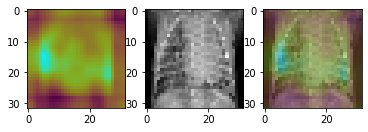

In [ ]:
#pneumonia
fig, ax = plt.subplots(1, 3)
ax[0].imshow(heatmap)
ax[1].imshow(image)
ax[2].imshow(output)

(32, 32) (32, 32, 3)


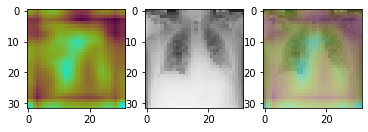

In [ ]:
#covid
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/X-Ray/Test/Covid/COVID-3250.png')
image = cv2.resize(image, (224, 224))
image = image.astype('float32') / 255
image = np.expand_dims(image, axis=0)

preds =model1.predict(image) 
i = np.argmax(preds[0])
icam = GradCAM(model1, i, 'block5_conv3') 
heatmap = icam.compute_heatmap(image)
heatmap = cv2.resize(heatmap, (32, 32))

image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/X-Ray/Test/Covid/COVID-3250.png')
image = cv2.resize(image, (32, 32))
print(heatmap.shape, image.shape)

(heatmap, output) = icam.overlay_heatmap(heatmap, image, alpha=0.5)
fig, ax = plt.subplots(1, 3)


ax[0].imshow(heatmap)
ax[1].imshow(image)
ax[2].imshow(output)

(32, 32) (32, 32, 3)


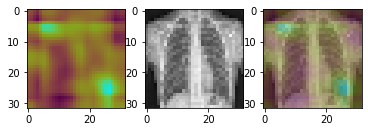

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/X-Ray/Test/Normal/IM-0001-0001.jpeg')
image = cv2.resize(image, (224, 224))
image = image.astype('float32') / 255
image = np.expand_dims(image, axis=0)

preds =model1.predict(image) 
i = np.argmax(preds[0])
icam = GradCAM(model1, i, 'block5_conv3') 
heatmap = icam.compute_heatmap(image)
heatmap = cv2.resize(heatmap, (32, 32))

image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/X-Ray/Test/Normal/IM-0001-0001.jpeg')
image = cv2.resize(image, (32, 32))
print(heatmap.shape, image.shape)

(heatmap, output) = icam.overlay_heatmap(heatmap, image, alpha=0.5)
fig, ax = plt.subplots(1, 3)

ax[0].imshow(heatmap)
ax[1].imshow(image)
ax[2].imshow(output)